<a href="https://colab.research.google.com/github/Purinkai001/Train/blob/main/Single_Cell_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scanpy

In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
import gzip




In [7]:
import os
adata_list = []
for dir in os.listdir('/content/Sample/Samp1'):
  with gzip.open(os.path.join('/content/Sample/Samp1', dir), 'rt') as f:
    adata_list.append(sc.read_csv(f).T)
    print(f'success')

check = adata_list[0]
check


success
success
success
success


IsADirectoryError: [Errno 21] Is a directory: '/content/Sample/Samp1/.ipynb_checkpoints'

In [8]:
with gzip.open('/content/Sample/Samp1/GSM5226574_C51ctr_raw_counts.csv.gz', 'rt') as f:
    adata = sc.read_csv(f).T


In [9]:
!pip install scvi-tools

In [10]:
import scvi
adata.X.shape

(6099, 34546)

In [36]:
pip install -i https://test.pypi.org/simple/ "scikit-misc==0.2.0rc1"
#Fucking piece of shit so outdated I need to install old version

Looking in indexes: https://test.pypi.org/simple/
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-misc
    Found existing installation: scikit-misc 0.5.1
    Uninstalling scikit-misc-0.5.1:
      Successfully uninstalled scikit-misc-0.5.1


In [34]:
!pip show scikit-misc

Name: scikit-misc
Version: 0.5.1
Summary: Miscellaneous tools for scientific computing.
Home-page: https://has2k1.github.io/scikit-misc/stable
Author: 
Author-email: Hassan Kibirige <has2k1@gmail.com>
License: Copyright (c) 2016, Hassan Kibirige
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
         * Redistributions of source code must retain the above copyright notice,
           this list of conditions and the following disclaimer.
         * Redistributions in binary form must reproduce the above copyright
           notice, this list of conditions and the following disclaimer in the
           documentation and/or other materials provided with the distribution.
         * Neither the name of  nor the names of its contributors may be used to
           endorse or promote products derived from this software without specific
 

SyntaxError: invalid syntax (<ipython-input-35-738c3365d056>, line 1)

In [37]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset=True,flavor = 'seurat_v3')
scvi.model.SCVI.setup_anndata(adata)


In [38]:
vae = scvi.model.SCVI(adata)
vae.train()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████| 400/400 [27:15<00:00,  3.83s/it, v_num=1, train_loss_step=331, train_loss_epoch=321]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [27:15<00:00,  4.09s/it, v_num=1, train_loss_step=331, train_loss_epoch=321]


In [39]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Epoch 165/400:  41%|████▏     | 165/400 [02:15<03:13,  1.21it/s, v_num=1, train_loss_step=0.344, train_loss_epoch=0.294]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.301. Signaling Trainer to stop.


In [59]:
df = solo.predict()
df

/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


,doublet,singlet
TAGGTACCATGGCCAC-1_1,0.780037,0.219963
ATTCACTGTAACAGGC-1_1,0.970639,0.029361
TAACTTCCAACCACGC-1_1,0.164429,0.835571
TTGGGTACACGACAAG-1_1,0.904617,0.095383
AGGCCACAGAGTCACG-1_1,0.912488,0.087512
...,...,...
CGCCATTGTTTGCCGG-1_1,0.035113,0.964887
CACTGGGGTCTACGTA-1_1,0.006691,0.993309
CATACTTGTAGAGGAA-1_1,0.005700,0.994300
TTTGGTTTCCACGGAC-1_1,0.001841,0.998159


In [60]:
df['prediction'] = solo.predict(soft = False)
#df.index = df.index.map(lambda x: x[:-2])

df

/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


,doublet,singlet,prediction
TAGGTACCATGGCCAC-1_1,0.780037,0.219963,doublet
ATTCACTGTAACAGGC-1_1,0.970639,0.029361,doublet
TAACTTCCAACCACGC-1_1,0.164429,0.835571,singlet
TTGGGTACACGACAAG-1_1,0.904617,0.095383,doublet
AGGCCACAGAGTCACG-1_1,0.912488,0.087512,doublet
...,...,...,...
CGCCATTGTTTGCCGG-1_1,0.035113,0.964887,singlet
CACTGGGGTCTACGTA-1_1,0.006691,0.993309,singlet
CATACTTGTAGAGGAA-1_1,0.005700,0.994300,singlet
TTTGGTTTCCACGGAC-1_1,0.001841,0.998159,singlet


In [61]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1310,1310
singlet,4789,4789


In [62]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
TAGGTACCATGGCCAC-1_1,0.780037,0.219963,doublet,0.560074
ATTCACTGTAACAGGC-1_1,0.970639,0.029361,doublet,0.941278
TAACTTCCAACCACGC-1_1,0.164429,0.835571,singlet,-0.671143
TTGGGTACACGACAAG-1_1,0.904617,0.095383,doublet,0.809233
AGGCCACAGAGTCACG-1_1,0.912488,0.087512,doublet,0.824976
...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,0.035113,0.964887,singlet,-0.929774
CACTGGGGTCTACGTA-1_1,0.006691,0.993309,singlet,-0.986618
CATACTTGTAGAGGAA-1_1,0.005700,0.994300,singlet,-0.988601
TTTGGTTTCCACGGAC-1_1,0.001841,0.998159,singlet,-0.996318


In [63]:
import seaborn as sns

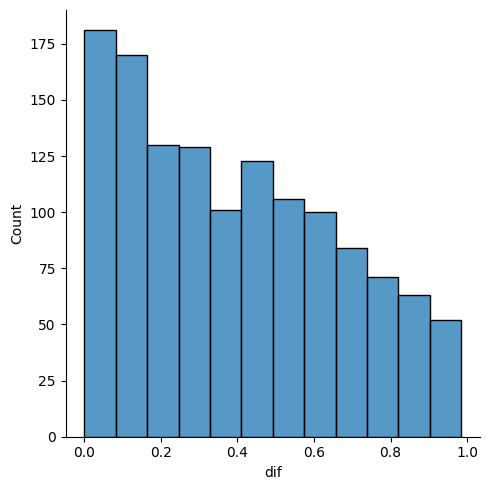

In [64]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [65]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 0.7)]
doublets

,doublet,singlet,prediction,dif
ATTCACTGTAACAGGC-1_1,0.970639,0.029361,doublet,0.941278
TTGGGTACACGACAAG-1_1,0.904617,0.095383,doublet,0.809233
AGGCCACAGAGTCACG-1_1,0.912488,0.087512,doublet,0.824976
ACTGATGTCTGCACCT-1_1,0.977350,0.022650,doublet,0.954701
ACTTCCGCACAACGCC-1_1,0.990304,0.009696,doublet,0.980608
...,...,...,...,...
CCTCCTCGTGTGGACA-1_1,0.921778,0.078222,doublet,0.843555
CAATACGCAATGTGGG-1_1,0.876901,0.123099,doublet,0.753802
ACGCACGTCGCACGAC-1_1,0.903531,0.096469,doublet,0.807062
ACTCTCGTCCCATAGA-1_1,0.876502,0.123498,doublet,0.753004


In [66]:
adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
adata.obs

<ipython-input-66-872675f3896c>:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet'] = adata.obs.index.isin(doublets.index)


,_scvi_batch,_scvi_labels,doublet
TAGGTACCATGGCCAC-1_1,0,0,False
ATTCACTGTAACAGGC-1_1,0,0,True
TAACTTCCAACCACGC-1_1,0,0,False
TTGGGTACACGACAAG-1_1,0,0,True
AGGCCACAGAGTCACG-1_1,0,0,True
...,...,...,...
CGCCATTGTTTGCCGG-1_1,0,0,False
CACTGGGGTCTACGTA-1_1,0,0,False
CATACTTGTAGAGGAA-1_1,0,0,False
TTTGGTTTCCACGGAC-1_1,0,0,False


In [67]:
adata = adata[~adata.obs.doublet]
adata.X.shape

(5871, 2000)

In [69]:
adata.write("PrePreprocess.h5ad")

In [72]:
samp = sc.read_h5ad('/content/PrePreprocess.h5ad')
samp.obs

,_scvi_batch,_scvi_labels,doublet
TAGGTACCATGGCCAC-1_1,0,0,False
TAACTTCCAACCACGC-1_1,0,0,False
CACTGAAGTCGAAGCA-1_1,0,0,False
TTACCGCCACTCAGAT-1_1,0,0,False
TTGGTTTTCCTAGCTC-1_1,0,0,False
...,...,...,...
CGCCATTGTTTGCCGG-1_1,0,0,False
CACTGGGGTCTACGTA-1_1,0,0,False
CATACTTGTAGAGGAA-1_1,0,0,False
TTTGGTTTCCACGGAC-1_1,0,0,False
